# 1.6 - k-Nearest-Neighbors (kNN) - Regression

__Input__: Dataset $((x_{11}, x_{12}, \cdots, x_{1n}, y_1), (x_{21}, x_{22}, \cdots, x_{2n}, y_2), \cdots, (x_{N1}, x_{N2}, \cdots, x_{Nn}, y_N))$ with **multiple** (n) features and a response variable, with $P$ measurements

__Purpose__: predict a response value $y_p$ for any given predictor $X_p = (x_{p1}, x_{p2}, ..., x_{pn})$

__Approach__: compute the average response of the data points nearest to $X_p$ (average over nearest neighbors)

__Assumptions__: None.

__Hyperparameters__: $k$, number of nearest neighbors, metric with which to compute distance.

Given some new feature $X_p$, proceed as follows:
1. Compute the distance $\mathrm{dist}(X_p, X_i)$ from $X_p$ to all other values $X_i$ (i=1:N) in the dataset. This is using some chosen distance metric.
2. Select the $k$ points with the smallest distances (nearest neighbors) into a neighborhood $\Omega$. In the case of ties, one can just pick one point or compute the average over the responses of the tied points.
3. Select the responses $y$ in this neighborhood, and compute their average: $y_p = \mathrm{mean}(\{y_i, i \in \Omega\}$).

In the code below, I implement the KNN algorithm in the naive way described above. Then I create a simple example illustrating it.

In [10]:
import numpy as np

class KNNRegressor:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        """
        Train the KNNRegressor model.
        - X_train (numpy.ndarray): Training data features.
        - y_train (numpy.ndarray): Training data labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = np.zeros(len(X_test)) 
        for i, x in enumerate(X_test):
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            nearest_neighbors = np.argsort(distances)[:self.k]  #for each point in X_test, find closest points in X_train
            mean_neighbor_value = np.mean(self.y_train[nearest_neighbors])
            predictions[i] = mean_neighbor_value
        return predictions


[-0.0165956   0.15517601  0.1222451   0.29379985  0.37379562  0.47402327
  0.60391871  0.74688992  0.86824238  1.00776335]


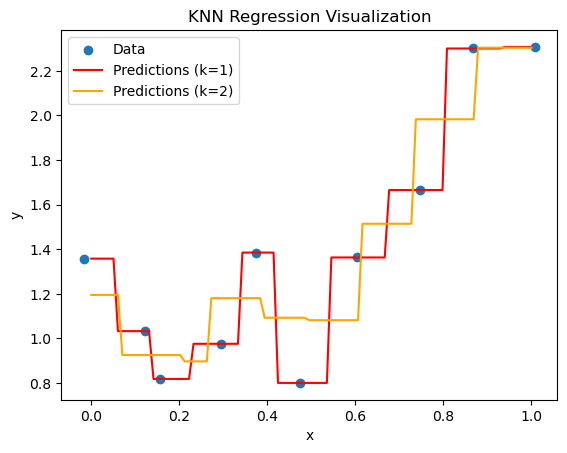

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set a random seed for reproducibility
np.random.seed(1) 

# Create a simple single-feature dataset 
x = np.linspace(0, 1, 10) + np.random.uniform(-0.1, 0.1, 10)  
y = 2 * x ** 2 - 0.5 * x + 1 + np.random.randn(10) * 0.2  # Add some noise

plt.scatter(x, y, label='Data')

# Perform kNN and plot results
k_values = [1, 2]
colors = ['red', 'orange']
for i, k in enumerate(k_values):
    # Initialize and fit the model
    knn_regressor = KNNRegressor(k=k)
    knn_regressor.fit(x.reshape(-1,1), y)
    
    # Calculate predictions for k=1
    x_grid = np.linspace(0, 1, 100)
    predictions = knn_regressor.predict(x_grid.reshape(-1,1))
    
    # Plot the dataset and predictions
    plt.plot(x_grid, predictions, color=colors[i], label=f'Predictions (k={k})')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('KNN Regression Visualization')
plt.show()